<a href="https://colab.research.google.com/github/Kirtanaaa/ML_Classification/blob/main/svmclassificationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

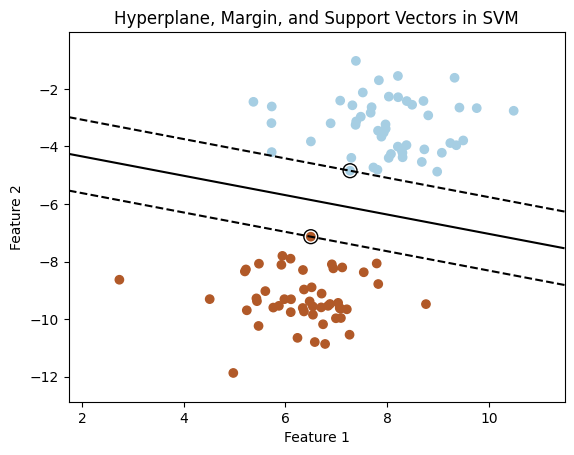

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Create an SVM model with a linear kernel
model = svm.SVC(kernel='linear')

# Fit the model to the data
model.fit(X, y)

# Get the support vectors and the indices of the support vectors
support_vectors = model.support_vectors_
support_vectors_indices = model.support_

# Get the coefficients of the hyperplane and the intercept
w = model.coef_[0]
b = model.intercept_[0]

# Create a meshgrid to plot the decision boundary
xx = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
yy = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot the data points and the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')
plt.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hyperplane, Margin, and Support Vectors in SVM')
plt.axis('tight')
plt.show()


When you run this code, it will display a plot with data points colored according to their classes (blue and red), the decision boundary (hyperplane) as a solid line, and the margins as dashed lines.

The support vectors will be represented as large circles.
This visualization should help you better understand the concept of the hyperplane, margin, and support vectors in SVM.

# INTRO

Support Vector Machines (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks.

SVM is particularly effective in solving binary classification problems, where the goal is to separate data points of two classes with a decision boundary.

However, SVM can also be extended to handle multi-class classification and regression tasks.

The main idea behind SVM is to find the optimal hyperplane that best divides the data points of different classes in the feature space.

This hyperplane is chosen in such a way that it maximizes the margin (distance) between the data points of the two classes closest to it.

These closest data points are called support vectors, and they play a crucial role in defining the decision boundary.

Here are the key concepts and steps involved in SVM:

1. Feature Space:

SVM operates in a high-dimensional feature space, where each data point is represented by its features. The goal is to find the hyperplane that separates the data points of different classes in this feature space.

2. Margin:

The margin is the distance between the hyperplane and the closest data points of each class. SVM aims to maximize this margin, as it helps to improve the generalization ability of the model.

3. Support Vectors:

Support vectors are the data points that lie closest to the decision boundary (hyperplane). These support vectors play a crucial role in defining the hyperplane and the margin. Only the support vectors affect the model's parameters, which makes SVM memory-efficient and computationally faster.

4. Soft Margin (C):

In real-world datasets, it is often impossible to find a perfect linear separation between classes. SVM allows for some misclassification of data points by introducing a parameter called "C," which represents the penalty for misclassification. A smaller C allows more misclassifications, while a larger C encourages a narrower margin and fewer misclassifications.

5. Kernel Trick:

One of the most powerful aspects of SVM is the kernel trick. SVM can implicitly transform the data points into a higher-dimensional space, where it becomes easier to find a linear separation. Common kernel functions include the linear kernel (for linearly separable data), polynomial kernel, radial basis function (RBF) kernel, and others.

Applications of SVM:

- Text categorization and sentiment analysis.

- Image recognition and object detection.

- Bioinformatics for gene expression classification.

- Finance for credit risk assessment and stock market prediction.

- Medical diagnosis and disease classification.

Advantages of SVM:

- Effective for high-dimensional data and cases with a small number of samples.

- Works well in both linearly separable and non-linearly separable cases (with the help of the kernel trick).

- Can handle large feature spaces and noisy data.

- Memory-efficient due to the use of support vectors only.

However, SVM may become computationally expensive for very large datasets or when the number of features is significantly high.

Overall, SVM is a versatile and powerful algorithm, and with proper hyperparameter tuning, it can produce accurate and robust models for various machine learning tasks.

## Why do we want to find the maximum margin?

The idea behind finding the maximum margin in Support Vector Machines (SVM) is to create a decision boundary (hyperplane) that is as robust and generalizable as possible.

Maximizing the margin and positioning the support vectors as far away from the hyperplane as possible offer several advantages:

1. Better Generalization:

A larger margin allows the decision boundary to have more "breathing room" between the classes. This extra space makes the model less sensitive to small variations or noise in the training data.

Consequently, the model is less likely to overfit the training data and can generalize better to new, unseen data.

2. Enhanced Robustness:

When the support vectors are far away from the hyperplane, the model is less influenced by outliers or mislabeled data points that may exist in the training set.

The presence of outliers can significantly affect the decision boundary if the margin is small.

By maximizing the margin, SVM can better handle outliers and improve the robustness of the model.

3. Improved Decision Making:

The support vectors play a crucial role in defining the decision boundary.

By positioning the support vectors as far away from the hyperplane as possible, SVM ensures that the decision boundary is primarily determined by the most informative and representative data points.

This leads to better decision-making when classifying new data points.

4. Simplified Model:

A larger margin tends to create a simpler decision boundary.

A simple decision boundary is less complex and easier to interpret, making the model more understandable and explainable.

5. Margin as a Confidence Measure:

The margin also serves as a measure of confidence in the model's predictions.

Data points that lie closer to the decision boundary are considered more uncertain in their classification, while those that lie far from the boundary are more confidently classified.

This confidence measure can be valuable in real-world applications where accurate prediction confidence is essential.

In summary, finding the maximum margin in SVM is a way to build a robust and well-generalized model.

The idea is to create a decision boundary with ample separation between classes, allowing for better classification of new data points and increased resilience to noise and outliers.

By placing the support vectors as far away from the hyperplane as possible, SVM ensures that the most influential and informative data points guide the decision boundary, leading to better model performance and interpretability.

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
dataset = pd.read_csv('insta.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into Training & Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=21)

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## SVM Training on Training set

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

## Predicting

In [8]:
print(classifier.predict(sc.transform([[32, 45000]])))

[1]


## Predicting Test set results

In [9]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


## Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cn = confusion_matrix(y_test,y_pred)
print(cn)
accuracy_score(y_test,y_pred)

[[37  0]
 [ 4 19]]


0.9333333333333333

## Visualizing Test Set results

<ipython-input-11-245113b75cfd>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


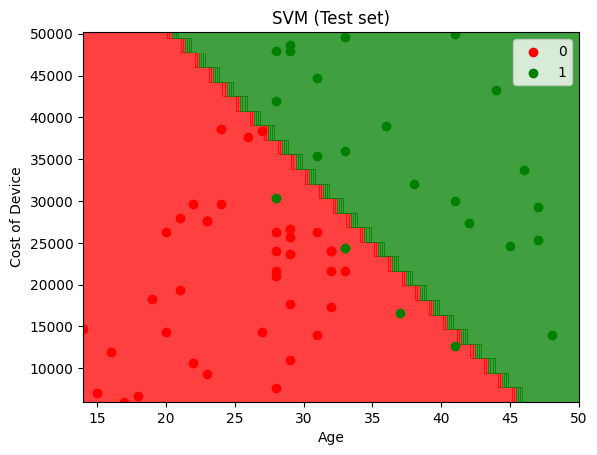

In [11]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 3, step = 1),
                     np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()

## Visualising Training set results

<ipython-input-12-85f343b6bfad>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


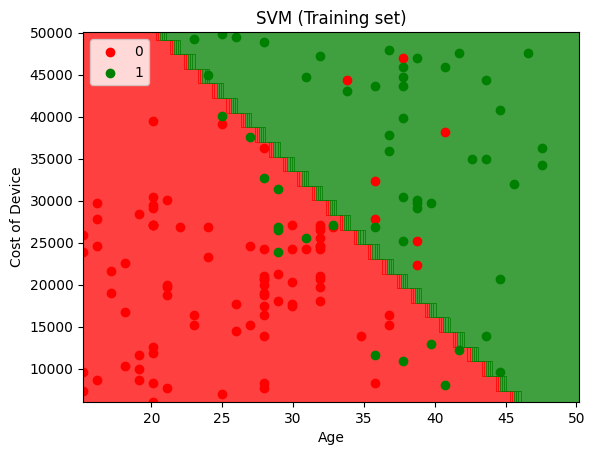

In [12]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 3, step = 1),
                     np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()